<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/06_MachineLearning/blob/main/01_Basic/01_ClassificationWithSKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification using Sci-kit Learn

In this course, we will learn how to perform classification using the Sci-kit Learn package from Python. Here, we will work with different examples for classification methods, using different datasets. In this course, we will use the following packages:

In [197]:
# Packages

import numpy as np                                               # N-dimensional array manipulation
import pandas as pd                                              # Data manipulation
from datetime import datetime                                    # Manipulation of datetime features

from sklearn.model_selection import train_test_split             # Split data into training and testing sets
from sklearn.preprocessing import StandardScaler                 # Normalization of the explicative features (standard scaler)

from sklearn.dummy import DummyClassifier                        # Dummy classification algorithm
from sklearn.svm import LinearSVC                                # Simple classification algorithm (Linear Support Vector Classification)
from sklearn.svm import SVC                                      # Support Vector Classification algorithm (generalized)
from sklearn.tree import DecisionTreeClassifier                  # Decision tree classification algorithm

from sklearn.metrics import accuracy_score                       # Accuracy score metric

import matplotlib.pyplot as plt                                  # Data visualization
import seaborn as sns                                            # Data visualization
from sklearn.tree import export_graphviz                         # Visualization of the decision tree
import graphviz                                                  # Graphviz package for visualizing the decision tree

# Example 01: Basic classification

First, we will present a very simple example: our algorithm should identify if something is a dog or a pig. Usually, we assign a number to each class, so it becomes easier for the computer to work with them. Thus, we can say that:

*   Dog: Class 0
*   Pig: Class 1

Nice! Now, to teach our algorithm about this classification, we first have to "show" to our machine some pigs and dogs, and define some characteristics for them. For instance, we can state whether they have:

*   Long pelage;
*   Short legs;
*   If it makes a dog sound.

These caractheristics, or features ($\mathbf{x}$), will help the model to perform our classification, which means that they will help to define which class our entry ($y$) belongs to. 

So, for instance, let's create some animals with their respective charactheristics:


In [8]:
# Features:
# Long pelage? | Short legs? | It makes a dog sound?

pig1 = [0, 1, 0]
pig2 = [0, 1, 1]
pig3 = [1, 1, 0]

dog1 = [0, 0, 1]
dog2 = [1, 0, 1]
dog3 = [1, 1, 1]

features = [pig1, pig2, pig3, dog1, dog2, dog3]

# Classes
# 0: Pig | 1: Dog

classes = [1, 1, 1, 0, 0, 0]

Since we have some features and some classes, we can fit a classification model. Here, we will use a very simple algorithm, the linear Support Vector Classification:

In [9]:
model = LinearSVC( )
model.fit(features, classes)

LinearSVC()

Now, let's predict whether a new animal is a pig or a dog. This new animal has long pelage, has short legs, and makes a dog sound. Thus:

In [10]:
new_animal = [1, 1, 1]
model.predict([new_animal])[0]

0

So, it seems that our new animal is a dog (class 0)! We can also perform classification for multiple animals:

In [12]:
animal1 = [1, 1, 1]
animal2 = [1, 1, 0]
animal3 = [0, 1, 1]

test = [animal1, animal2, animal3]

y_pred = model.predict(test)

y_pred

array([0, 1, 1])

Usually, a test set is used to compare the result of a model with other known results. Note that these three new animals were actually taken from the initial dataset, and their correct labels were:

In [13]:
y_test = [0, 1, 1]
y_test

[0, 1, 1]

We can compare these two using:

In [14]:
y_pred == y_test

array([ True,  True,  True])

So, all of our predictions were correct! When we have many test entries, we usually consider a given metric. Thus, we can evaluate the accuracy of our model by:

In [30]:
is_pred_correct = y_pred == y_test
acc = is_pred_correct.sum( )/len(is_pred_correct)

print("Accuracy: {:.2f} %".format(acc*100))

Accuracy: 100.00 %


We can also evaluate the accuracy simply using:

In [31]:
acc = accuracy_score(y_pred, y_test)

print("Accuracy: {:.2f} %".format(acc*100))

Accuracy: 100.00 %


# Example 02: Using classification for a "real' problem

Now, we will work with another dataset, about users who acessed a given site. Since now we have a much bigger dataset, we will import it from an external file:

In [33]:
df = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv')

Let's see the header of our dataset and the first 5 rows:

In [35]:
df.head( )

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


Here we have information about:

*   Whether the users acessed the home of our website;
*   Whether the users acessed the 'how it works' page of our website;
*   Whether the users acessed the 'contact' page of our website;
*   Whether the users bought an item on our website.

Here, our target feature (what we want to predict) is the feature **bought**. Thus, let's separate our data:



In [38]:
y = df.bought                       # Target feature
X = df.drop('bought', axis = 1)     # Explicative features

It is not in the best practices to use the **entire** dataset for training, because then we will have to use some samples used for training in the testing of our model. Thus, we usually perform a split between training and testing sets:

In [40]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)

Finally, let's fit our model using the Linear SVC model:

In [44]:
model = LinearSVC( )
model.fit(X_train, y_train)

LinearSVC()

Now, let's get the accuracy in our test set:

In [49]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 96.00%


## Understanding more about our dataset

Let's understand more about our dataset. First, let's see how many entries we have for each target value:

In [50]:
df.bought.value_counts( )

0    66
1    33
Name: bought, dtype: int64

So, we have 66 entries who did not bought, and 33 who bought from our site. The ratio $n_0/n_1 = 2.0$. This means that our dataset is **not balanced**, which may affect the performance of our model. Let's also see the ratio in our training and testing sets:

In [58]:
y_train.value_counts( )

0    50
1    24
Name: bought, dtype: int64

In [59]:
y_test.value_counts( )

0    16
1     9
Name: bought, dtype: int64

So, the ratio in our training set is 2.08, while the ratio in the test set is 1.78. 

In [60]:
50/24

2.0833333333333335

In [61]:
16/9

1.7777777777777777

This is risky, because our algorithm will be biased towards the ratio in the training set, which is not the same as the real ratio nor the ratio from the testing set. 

We can force the split ratio to remain close by using the *stratify* parameter:

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED, stratify = y)

model = LinearSVC( )
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 96.00%


Our accuracy was actually the same. However, now, we have closer ratios:

In [63]:
y_train.value_counts( )

0    49
1    25
Name: bought, dtype: int64

In [64]:
y_test.value_counts( )

0    17
1     8
Name: bought, dtype: int64

# Example 03: Working with two-dimensional data

An advantage of working with two-dimensional data is that we are able to visualize our classifications. Let's import it using:

In [65]:
df = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')

df.head( )

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


This new dataset has information about:

*   The expected number of hours to finish a project.
*   The price we want to pay
*   Whether the project is unfinished or not.

Let's change our unfinished feature to finished, and invert its values:



In [67]:
swap_values = {0 : 1, 1 : 0}

df['finished'] = df.unfinished.map(swap_values)
df.drop('unfinished', axis = 1, inplace = True)

In [69]:
df.head( )

,expected_hours,price,finished
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0


Nice. Now, again, let's use a value_counts to see the number of finished works:

In [70]:
df.finished.value_counts( )

1    1134
0    1023
Name: finished, dtype: int64

So, our data is not very unbalanced. The ratio of each class is almost 50%. Since we have a two-dimensional dataset (only two explicative features), we can visualize them using:

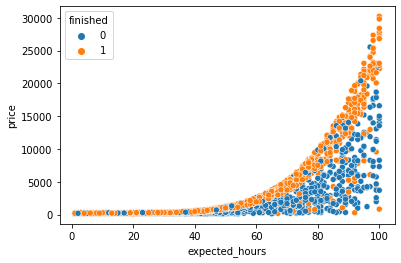

In [72]:
sns.scatterplot(x = 'expected_hours', y = 'price', hue = 'finished', data = df)

Note that, as the number of expected hours increase, so does the price. Also, usually, the projects will only get finished if the price is adequate to the number of hours. 

So, let's model this classification:

In [73]:
y = df.finished
X = df.drop('finished', axis = 1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED, stratify = y)

model_SVC = LinearSVC( )
model_SVC.fit(X_train, y_train)

y_pred = model_SVC.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 57.41%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


So, it seems like a very bad accuracy. To have something to compare to, let's use a dummy classifier, which simply gets the highest frequency class, and assumes that all data is from that class. Thus, we can do:

In [86]:
model_dummy = DummyClassifier(strategy = 'most_frequent')
model_dummy.fit(X_train, y_train)

y_pred_dummy = model_dummy.predict(X_test)

acc = accuracy_score(y_test, y_pred_dummy)

print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 52.59%


So, this dummy classifier was almost as good as our SVC model. Note that the SVC is a linear model, but the relationship between our features is not linear. Let's see the classifications for the SVC:

In [88]:
df_test = X_test.copy( )
df_test = df_test.merge(y_test, left_index=True, right_index=True)
df_test['SVC_pred'] = model_SVC.predict(X_test)

df_test.head( )

,expected_hours,price,finished,SVC_pred
1516,83,12048,1,1
443,13,151,0,0
597,10,132,0,0
937,65,1133,0,0
939,54,292,0,0


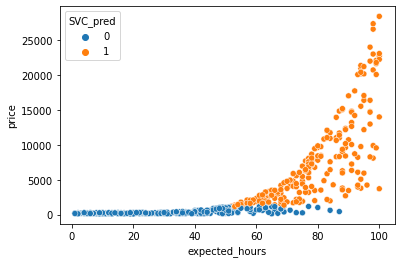

In [90]:
sns.scatterplot(x = 'expected_hours', y = 'price', hue = 'SVC_pred', data = df_test)

To improve our visualization, we can do:

In [93]:
x_min = df_test.expected_hours.min( )
x_max = df_test.expected_hours.max( )

y_min = df_test.price.min( )
y_max = df_test.price.max( )

n_pixels = 100

In [99]:
x_axis = np.arange(x_min, x_max, (x_max - x_min)/n_pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min)/n_pixels)

xx, yy = np.meshgrid(x_axis, y_axis)

data_for_hue = np.c_[xx.ravel( ), yy.ravel( )]               # Creates a grid for the entire data domain

Let's perform model prediction on the data from the grid:

In [102]:
z = model_SVC.predict(data_for_hue).reshape(xx.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


Now, let's plot this using matplotlib:

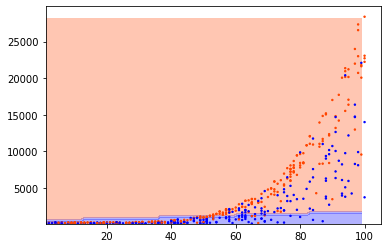

In [133]:
colors = np.array(["blue", "orangered"])

cs = plt.contourf(xx, yy, z, [0,0.99], colors = colors, alpha = 0.3, extend='both')
cs.cmap.set_over(colors[1])
cs.cmap.set_under(colors[0])
cs.changed()
plt.scatter(df_test.expected_hours, df_test.price, c = colors[df_test.finished], s = 2) # plots the real data and their classification

Note that we can actually identify a line separating finished and unfinished works. In fact, we need to use a better algorithm to model our data. 

## Testing a better estimator

Now, we will try to use another estimator, which is able to identify non-linear patterns. Thus, we will use a generalized Support Vector Classification model.

In [138]:
model_SVC2 = SVC( )
model_SVC2.fit(X_train, y_train)

y_pred = model_SVC2.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))

df_test['SVC_pred2'] = y_pred 

Accuracy: 56.85%


So, it seems that our generalized SVC algorithm was not that much better. Let's plot its classification:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


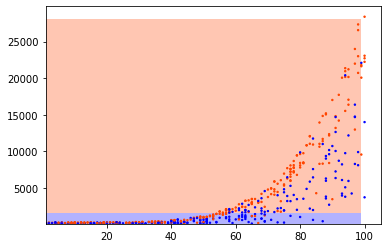

In [139]:
z = model_SVC2.predict(data_for_hue).reshape(xx.shape)

colors = np.array(["blue", "orangered"])

cs = plt.contourf(xx, yy, z, [0,0.99], colors = colors, alpha = 0.3, extend='both')
cs.cmap.set_over(colors[1])
cs.cmap.set_under(colors[0])
cs.changed()
plt.scatter(df_test.expected_hours, df_test.price, c = colors[df_test.finished], s = 2) # plots the real data and their classification

Note that the classification threshold is, once again, very close to a straight line. Note data our data is not normalize: while prices go from 0 to ~30000, hours go from 0 to ~100. Let's normalize all of our explicative features using the standard scaler:

In [151]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED, stratify = y)

scaler = StandardScaler( )
scaler.fit(X_train)
X_train_np = scaler.transform(X_train_raw)
X_test_np = scaler.transform(X_test_raw)

X_train = pd.DataFrame(X_train_np, columns = X_train_raw.columns)
X_test = pd.DataFrame(X_test_np, columns = X_train_raw.columns)

The standard scaler uses the following normalization method:

\begin{equation}
X_{i, j, n} = \dfrac{X_{i, j} - \overline{x}_i}{s_i}
\end{equation}
where $\overline{x}_i$ is the average for feature $i$ and $s_i$ is the standard deviation for feature $i$. Now, let's see those sets:

In [152]:
X_train.head( )

,expected_hours,price
0,-1.162871,-0.568840
1,-0.287861,-0.506275
2,-0.427862,-0.549527
3,1.077156,-0.000726
4,-0.602865,-0.553752


In [153]:
X_test.head( )

,expected_hours,price
0,1.147157,1.809233
1,-1.302873,-0.584129
2,-1.407874,-0.587952
3,0.517149,-0.386577
4,0.132144,-0.555764


Nice! Now, let's fit our SVC again, and plot its classification:

In [158]:
model_SVC3 = SVC( )
model_SVC3.fit(X_train, y_train)

y_pred = model_SVC3.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 67.78%


So, our accuracy was a little higher, as we are right in almost 70% of our data.

In [162]:
x_min = X_test.expected_hours.min( )
x_max = X_test.expected_hours.max( )

y_min = X_test.price.min( )
y_max = X_test.price.max( )

n_pixels = 100

In [163]:
x_axis = np.arange(x_min, x_max, (x_max - x_min)/n_pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min)/n_pixels)

xx, yy = np.meshgrid(x_axis, y_axis)

data_for_hue = np.c_[xx.ravel( ), yy.ravel( )]               # Creates a grid for the entire data domain

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


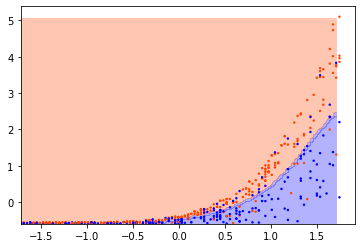

In [165]:
z = model_SVC3.predict(data_for_hue).reshape(xx.shape)

colors = np.array(["blue", "orangered"])

cs = plt.contourf(xx, yy, z, [0,0.99], colors = colors, alpha = 0.3, extend='both')
cs.cmap.set_over(colors[1])
cs.cmap.set_under(colors[0])
cs.changed()
plt.scatter(X_test.expected_hours, X_test.price, c = colors[df_test.finished], s = 2) # plots the real data and their classification

Nice! Now, note that we were able to identify a non-linear relationship in our data! Great.

# Example 04: Working with a more complex dataset

Now, we will work with a more complex dataset, with more features:

In [177]:
df = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv', index_col = 0)

df.head( )

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


So, here, we have information about:

*   The mileage per year for each car;
*   The year of the car model;
*   The price;
*   Whether it was sold or not.

Since we have more explicative features, it is harder to visualize our model. However, we can still use adequate metrics to understand if our model was able to perform accurate classifications.

First, let's change the values for the target feature:



In [178]:
target_map = {'yes' : 1, 'no' : 0}

df.sold = df.sold.map(target_map)

Also, let's change one of our features: instead of working with the model year, let's work with the age of the model:

In [180]:
current_year = datetime.today( ).year
df['model_age'] = current_year - df['model_year']
df.drop('model_year', axis = 1, inplace = True)
df.head( )

,mileage_per_year,price,sold,model_age
0,21801,30941.02,1,22
1,7843,40557.96,1,24
2,7109,89627.50,0,16
3,26823,95276.14,0,7
4,7935,117384.68,1,8


Finally, let's define our sets for model training/testing:

In [181]:
y = df.sold
X = df.drop('sold', axis = 1)

Now, let's normalize our explicative features:

In [184]:
scaler = StandardScaler( )
scaler.fit(X)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED, stratify = y)

X_train_np = scaler.transform(X_train_raw)
X_test_np = scaler.transform(X_test_raw)

X_train = pd.DataFrame(X_train_np, columns = X_train_raw.columns)
X_test = pd.DataFrame(X_test_np, columns = X_train_raw.columns)

SEED = 42

Let's use our linear SVC model:

In [185]:
linear_svc = LinearSVC( )
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 70.12%


Our accuracy using the Linear SVC is ~70%, which means that we were correct in almost 70% of our predictions. For comparison purposes, let's use a dummy classifier:

In [186]:
dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 58.00%


So, our Linear SVC algorithm is better than the dummy classifier. Now, let's use a generalized SVC model:

In [187]:
gen_svc = SVC( )
gen_svc.fit(X_train, y_train)

y_pred = gen_svc.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 76.00%


So, the generalized SVC model was the best one, as its accuracy was the highest (76%)!

## Using a tree-based algorithm

Support Vector Machines are very basic algorithms for classification. They work as a black-box and, thus, it is not trivial to understand what the classifier is doing, and why it is performing certain classifications. To get a better sense of this, we can use different algorithms, derived from decision trees.

For the decision tree, we will not use the standard scaler (decision trees usually work well even if data is not normalized). For that end, we simply do:

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED, stratify = y)

dec_tree = DecisionTreeClassifier(max_depth = 3)
dec_tree.fit(X_train, y_train)

y_pred = dec_tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 78.04%


So, our decision tree was a little better than our SVC algorithm. Using decision trees, we can understand why the model is making a given decision. To visualize the decision tree, we can use:

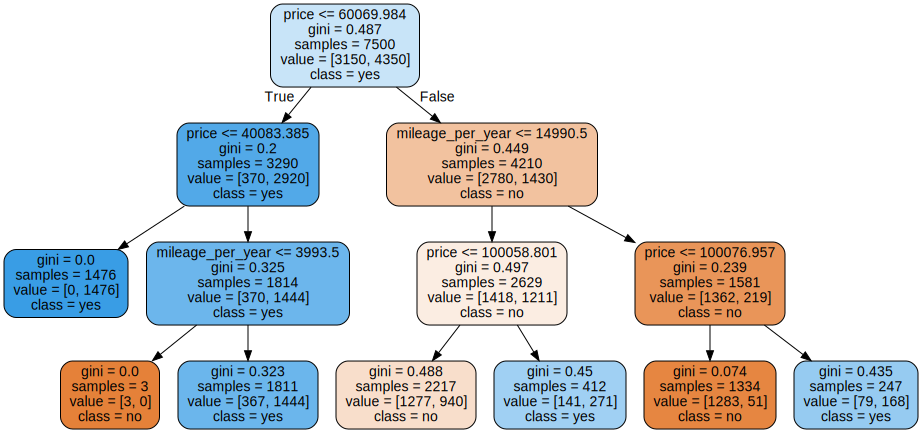

In [209]:
dot_data = export_graphviz(dec_tree, feature_names = X.columns, 
                           filled = True, rounded = True, 
                           class_names = ['no', 'yes'], label='all')
graph = graphviz.Source(dot_data)
graph

Here, it is easier to understand why the model is making a given decision. For instance, if the price is lower than 40083.385, our model decides that the car will be sold. If the price is lower than 60069.984, higher than 40083;385, and mileage_per_year is higher than 3993.5, the car will be sold. And so on.